In [1]:
import pandas as pd

# Load the wine dataset
df = pd.read_csv("WineQT.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


* Step 1: Data Loading
Loaded the dataset WineQT.csv using Pandas.
Verified structure: 12 columns including chemical features, Id, and quality (target variable).

In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

* Step 2: Data Exploration & Cleaning
Checked for missing values → None found 
Dropped the Id column as it’s not useful for prediction.

In [3]:
from sklearn.model_selection import train_test_split

# Drop the Id column
df = df.drop('Id', axis=1)

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* Step 3: Feature-Target Split
Defined features (X) = all columns except quality.
Defined target (y) = quality.

Split the dataset into training (80%) and testing (20%) sets.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
rf = RandomForestClassifier(random_state=42)
sgd = SGDClassifier(random_state=42)
svc = SVC(random_state=42)

# Train models
rf.fit(X_train, y_train)
sgd.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Make predictions
rf_preds = rf.predict(X_test)
sgd_preds = sgd.predict(X_test)
svc_preds = svc.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("SGD Accuracy:", accuracy_score(y_test, sgd_preds))
print("SVC Accuracy:", accuracy_score(y_test, svc_preds))


Random Forest Accuracy: 0.7030567685589519
SGD Accuracy: 0.4585152838427948
SVC Accuracy: 0.5633187772925764


* Step 4: Model Training & Evaluation
Trained and tested the following classification models:

Model	Accuracy Score
Random Forest Classifier	70.3% 
SGD Classifier              45.9% 
Support Vector Classifier	56.3% 

* Random Forest performed the best with the highest accuracy.

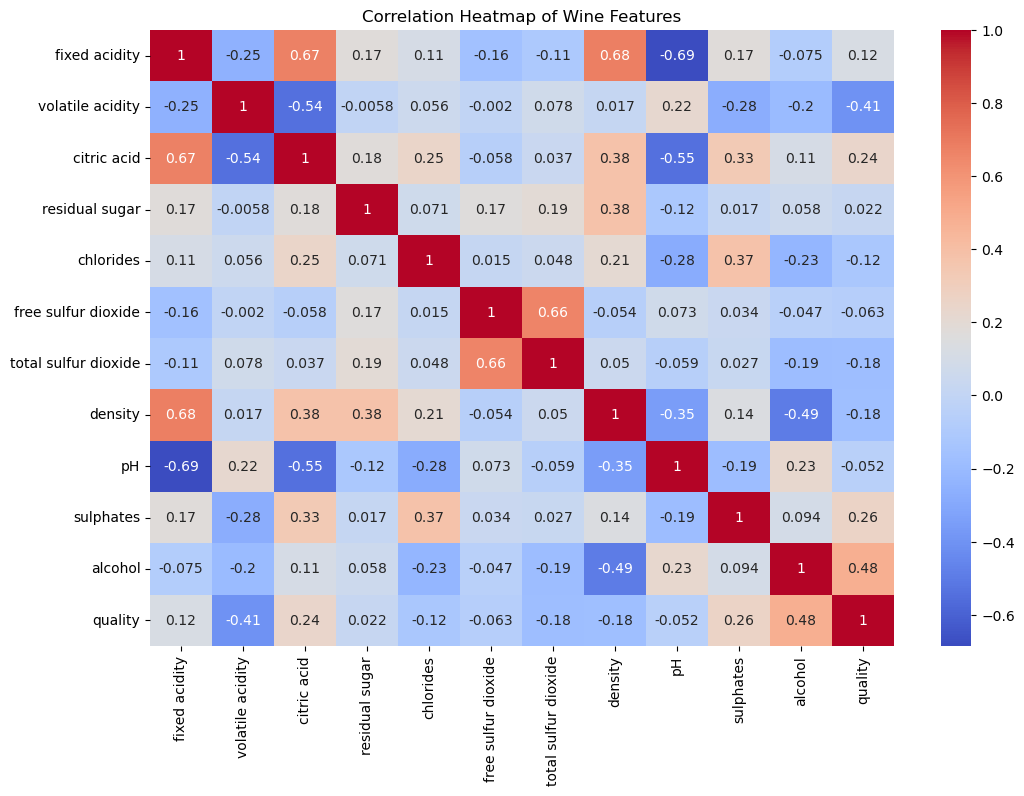

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Features')
plt.show()


* Correlation Heatmap

We created a heatmap using Seaborn to visualize the correlation between different chemical features and wine quality.

This helped us identify which factors are most strongly related to wine quality. For example, alcohol showed a strong positive correlation with quality, while density and volatile acidity showed negative correlations.

Such insights are useful for feature selection and model interpretation.


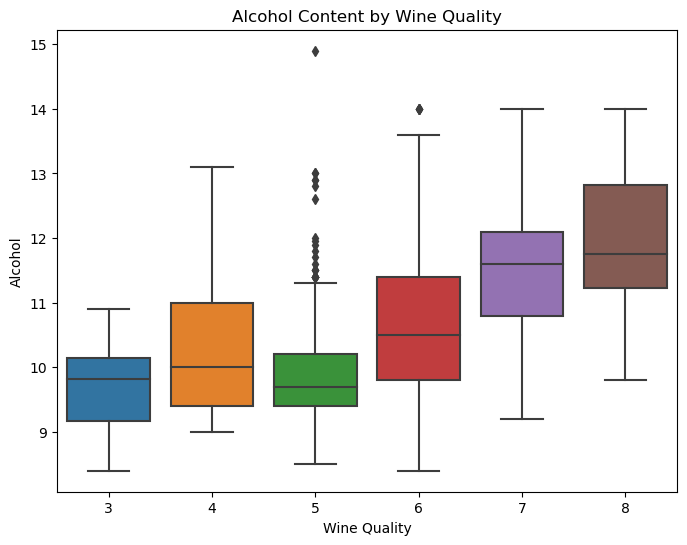

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.show()


* Box Plot - Alcohol vs Wine Quality

We plotted a box plot to understand how alcohol content varies across different wine quality levels.

The plot revealed that wines with higher quality scores generally have higher alcohol content.

This visualization helps detect the distribution, central tendency, and potential outliers in alcohol for each quality class.


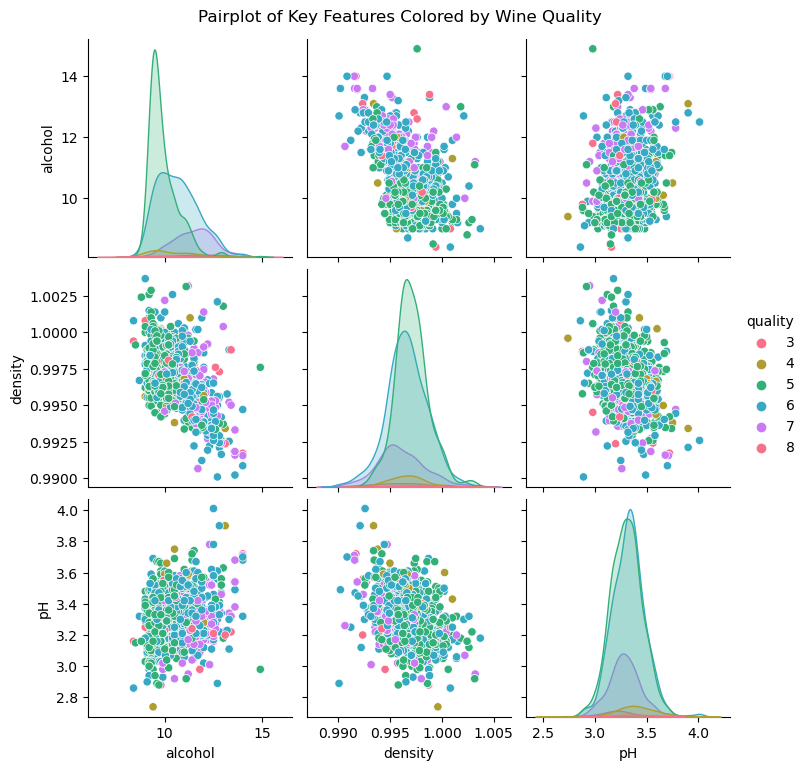

In [7]:
sns.pairplot(df[['alcohol', 'density', 'pH', 'quality']], hue='quality', palette='husl')
plt.suptitle('Pairplot of Key Features Colored by Wine Quality', y=1.02)
plt.show()


* Pairplot - Multivariate Feature Relationships by Quality

A pairplot was created to explore interactions between multiple features like alcohol, density, pH, and citric acid, color-coded by wine quality.

This visualization helps us observe patterns and separations between quality classes in multi-dimensional space, offering insights into which combinations of features could be useful for classification.


* Final Insights:

Alcohol has the strongest positive correlation with wine quality — higher alcohol = better quality.

Volatile acidity is negatively correlated — more acidity = lower quality.

Boxplot confirms: higher quality wines generally have more alcohol.

Pairplot shows patterns between alcohol, density, and pH, but alcohol stands out as the clearest indicator.

**Conclusion: Alcohol is the best predictor of wine quality. Next best features include volatile acidity and sulphates.

In [8]:
df.to_csv("cleaned_wine_data.csv", index=False)


In [9]:
plt.savefig("heatmap_correlation.png")


<Figure size 640x480 with 0 Axes>